In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-powered-resume-screening-dataset-2025/AI_Resume_Screening.csv


In [2]:
rescreen = pd.read_csv('/kaggle/input/ai-powered-resume-screening-dataset-2025/AI_Resume_Screening.csv')

rescreen.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_ID               1000 non-null   int64 
 1   Name                    1000 non-null   object
 2   Skills                  1000 non-null   object
 3   Experience (Years)      1000 non-null   int64 
 4   Education               1000 non-null   object
 5   Certifications          726 non-null    object
 6   Job Role                1000 non-null   object
 7   Recruiter Decision      1000 non-null   object
 8   Salary Expectation ($)  1000 non-null   int64 
 9   Projects Count          1000 non-null   int64 
 10  AI Score (0-100)        1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [3]:
rescreen.head()

,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,104895,8,100
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100
2,3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70
3,4,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95
4,5,Julie Hill,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,87441,9,100


In [4]:
rescreen.describe()
rescreen.isna().sum()

Resume_ID                   0
Name                        0
Skills                      0
Experience (Years)          0
Education                   0
Certifications            274
Job Role                    0
Recruiter Decision          0
Salary Expectation ($)      0
Projects Count              0
AI Score (0-100)            0
dtype: int64

In [5]:
# Fill missing certifications with 'None'
rescreen['Certifications'] = rescreen['Certifications'].fillna('None')

# Normalize text fields
for col in ['Skills', 'Education', 'Certifications', 'Job Role', 'Recruiter Decision']:
    rescreen[col] = rescreen[col].str.strip().str.title()

# Check unique values for categorical insights
for col in ['Education', 'Job Role', 'Recruiter Decision']:
    print(f"{col} unique values:\n", rescreen[col].unique(), "\n")

# Quick statistical summary
rescreen.describe()

Education unique values:
 ['B.Sc' 'Mba' 'B.Tech' 'Phd' 'M.Tech'] 

Job Role unique values:
 ['Ai Researcher' 'Data Scientist' 'Cybersecurity Analyst'
 'Software Engineer'] 

Recruiter Decision unique values:
 ['Hire' 'Reject'] 



,Resume_ID,Experience (Years),Salary Expectation ($),Projects Count,AI Score (0-100)
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,4.896000,79994.486000,5.13300,83.950000
std,288.819436,3.112695,23048.472549,3.23137,20.983036
min,1.000000,0.000000,40085.000000,0.00000,15.000000
25%,250.750000,2.000000,60415.750000,2.00000,70.000000
50%,500.500000,5.000000,79834.500000,5.00000,100.000000
75%,750.250000,8.000000,99583.250000,8.00000,100.000000
max,1000.000000,10.000000,119901.000000,10.00000,100.000000


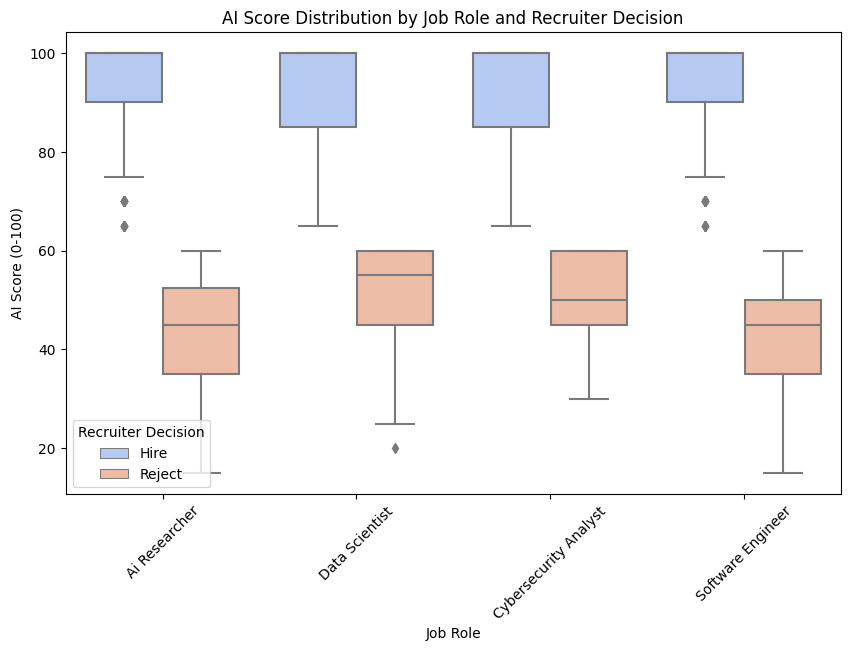

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='Job Role', y='AI Score (0-100)', data=rescreen, hue='Recruiter Decision', palette='coolwarm')
plt.title("AI Score Distribution by Job Role and Recruiter Decision")
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


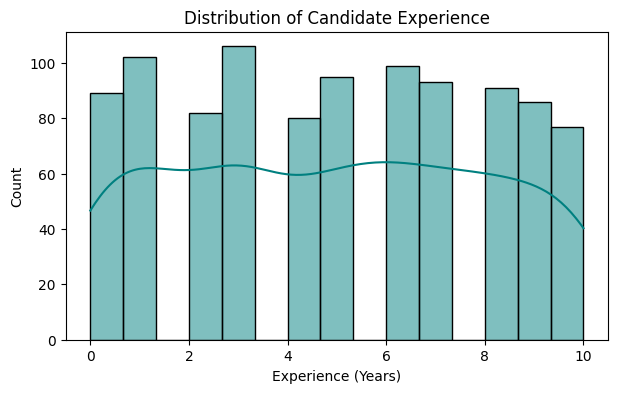

In [7]:
plt.style.use('seaborn-v0_8-muted')

# Distribution of Experience
plt.figure(figsize=(7,4))
sns.histplot(rescreen['Experience (Years)'], bins=15, kde=True, color='teal')
plt.title("Distribution of Candidate Experience")
plt.show()

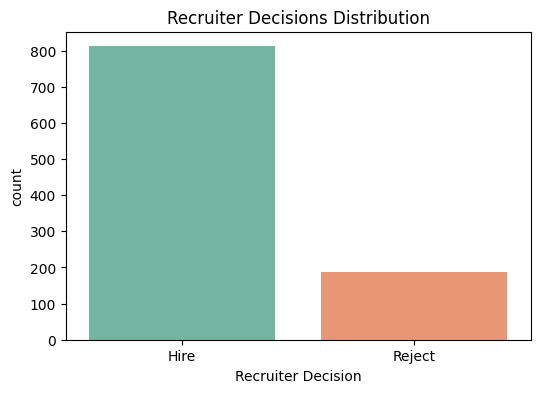

In [8]:
# Recruiter Decision count
plt.figure(figsize=(6,4))
sns.countplot(x='Recruiter Decision', data=rescreen, palette='Set2')
plt.title("Recruiter Decisions Distribution")
plt.show()

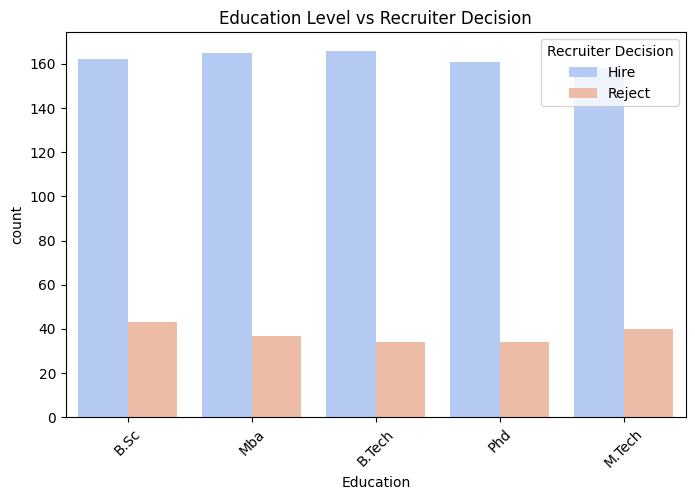

In [9]:
# Education Level vs Recruiter Decision
plt.figure(figsize=(8,5))
sns.countplot(x='Education', hue='Recruiter Decision', data=rescreen, palette='coolwarm')
plt.title("Education Level vs Recruiter Decision")
plt.xticks(rotation=45)
plt.show()

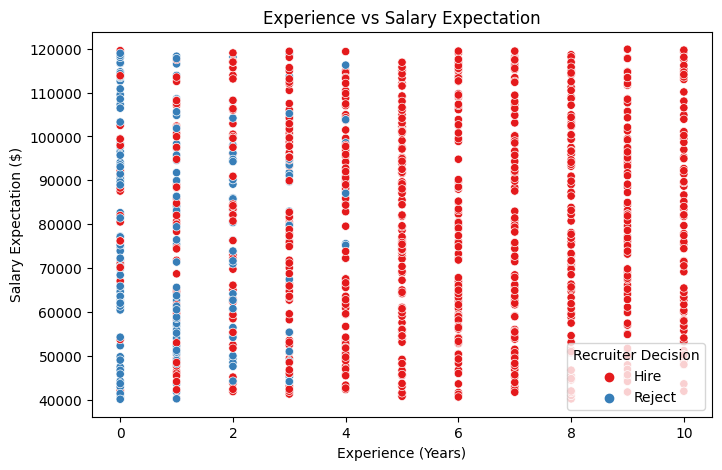

In [10]:
# Salary vs Experience
plt.figure(figsize=(8,5))
sns.scatterplot(x='Experience (Years)', y='Salary Expectation ($)', hue='Recruiter Decision', data=rescreen, palette='Set1')
plt.title("Experience vs Salary Expectation")
plt.show()

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Features and target
features = rescreen[['Skills', 'Experience (Years)', 'Education', 'Certifications', 
                     'Job Role', 'Salary Expectation ($)', 'Projects Count']].copy()
target = rescreen['Recruiter Decision']

# Encode categorical features
le_cols = {}
encoded_features = pd.DataFrame()
for col in ['Skills', 'Education', 'Certifications', 'Job Role']:
    le = LabelEncoder()
    features[col] = features[col].astype(str)
    le.fit(features[col])
    encoded_features[col] = features[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
    le_cols[col] = le

# Keep numeric features
for col in ['Experience (Years)', 'Salary Expectation ($)', 'Projects Count']:
    encoded_features[col] = features[col]

# Encode target
le_target = LabelEncoder()
y = le_target.fit_transform(target)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(encoded_features, y)

# Your base resume info
base_resume = {
    'Skills': 'Python, PHP, JavaScript, C, HTML, CSS, SQL, scikit-learn, Pandas, NumPy, MySQL, MongoDB, Matplotlib',
    'Education': 'MS',
    'Certifications': 'None',
    'Experience (Years)': 3,
    'Salary Expectation ($)': 100000,
    'Projects Count': 5
}

results = []

for role in rescreen['Job Role'].unique():
    resume = pd.DataFrame({**base_resume, 'Job Role': role}, index=[0])
    
    # Encode categorical fields
    for col in ['Skills', 'Education', 'Certifications', 'Job Role']:
        le = le_cols[col]
        resume[col] = resume[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
    
    # Reorder columns to match training data
    resume = resume[encoded_features.columns]
    
    # Get probability of 'Hire'
    probs = rf.predict_proba(resume)[0]
    hire_idx = list(le_target.classes_).index('Hire')
    hire_prob = probs[hire_idx] * 100  # percentage
    
    results.append((role, hire_prob))

# Sort by highest probability
results = sorted(results, key=lambda x: x[1], reverse=True)

print("Roles with hire probability for your resume:")
for role, prob in results:
    print(f"- {role}: {prob:.2f}% chance")


Roles with hire probability for your resume:
- Software Engineer: 87.00% chance
- Ai Researcher: 85.00% chance
- Cybersecurity Analyst: 85.00% chance
- Data Scientist: 84.00% chance
